### Clean Juneau Snow Depth Timeseries Data 

Notebook contents 
* Load the Powder Patch data, and the SNOTEL data, and clean them together here 
* Produce a few figures of them together 

created by Cassie Lumbrazo\
last updated: Oct 2025\
run location: UAS linux\
python environment: **xarray**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import scipy

In [3]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
pwd

'/home/cassie/python/repos/juneau_data_analysis'

SNOTEL Data first loaded in `2_snotel_data.ipynb`

In [2]:
filename = '/hdd/snow_hydrology/met_station/snotel/heenlatinee/site1270_hourly_2016_2025.nc' # lightly cleaned snotel data 

# open the netcdf 
ds_site1270 = xr.open_dataset(filename)
ds_site1270

<xarray.Dataset> Size: 8MB
Dimensions:   (datetime: 79654)
Coordinates:
  * datetime  (datetime) datetime64[ns] 637kB 2015-10-01 ... 2025-09-30T23:00:00
Data variables:
    site_id   (datetime) int32 319kB ...
    swe       (datetime) float64 637kB ...
    precip1   (datetime) float64 637kB ...
    precip2   (datetime) float64 637kB ...
    temp      (datetime) float64 637kB ...
    hs        (datetime) float64 637kB ...
    bat       (datetime) float64 637kB ...
    wdir      (datetime) float64 637kB ...
    ws_x      (datetime) float64 637kB ...
    ws_v      (datetime) float64 637kB ...
    rh        (datetime) float64 637kB ...
    pres      (datetime) float64 637kB ...

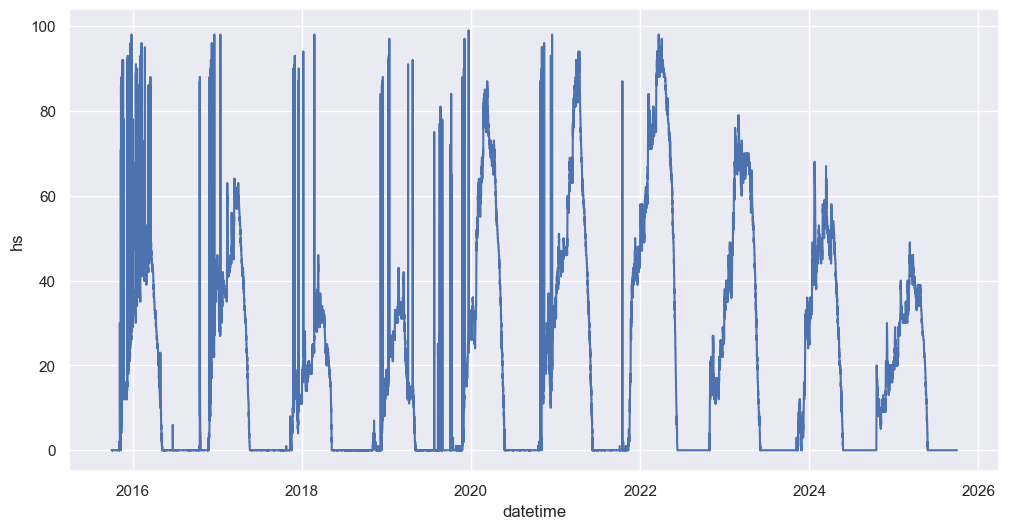

In [3]:
ds_site1270['hs'].plot()

Now, I need to do the same for the Powder Patch dataset (lightly cleaned in `1_load_all_powderpatch.ipynb` then saved as netcdf)